# Ejercicio Computacional 2
## Esteban Lizaso - DNI: 35.375.488 - Libreta: 319/11 

## Problema 1 - Guía 3(G3P10)
### Método Monte Carlo

Primero importo las librerías que voy a utilizar a los largo del ejercicio.

In [1]:
import numpy as np
from random import random
import math
import scipy.stats as sci
from scipy.stats import norm
from scipy.special import comb
import matplotlib.pyplot as plt
from math import pi
from math import tan

Defino las funciones que voy a utilizar en los diferentes items.

La función barra genera n números al azar con distribución de Cauchy a partir de la U[a,b]. Para esto utiliza el resultado encontrado en el problema 5 de la guía 3, dónde vimos que la tangente de un número que proviene de una distribución uniforme, genera una distribución de Cauchy.

La función cauchy genera la curva teorica de la distribución de cauchy con n puntos equiespaciados en el intervalo [a,b], y utiliza un factor de normalización C. Dicho factor fue calculado a mano (pidiendo que la integral en el intervalo [a,b] sea igual a 1) en cada uno de los casos que se mostrarán a continuación.

La función cauchy2 calcula el valor de f(x) para un dado x, cuando f es la dist. de Cauchy. También utiliza el factor de normalización C definido anteriormente.

In [2]:
def barra(n,a,b):                               #Armo una función que con los datos del problema 5 genere n números al azar
    tita=[]                                     # que sigan la distribución de Cauchy a partir de la U[a,b]
    i=0
    y=[]
    for i in range(n):                          #Creo un array llamado tita que contenga n números 
        tita.append(np.random.uniform(a,b))     #aleatorios con la dist. U[a,b]
    tita = np.array(tita)
    for i in range(len(tita)):                  #Acá utilizo el resultado del ejercicio 5, dónde vimos que la
        y.append(tan(tita[i]))                  # tangente de una uniforme tiene distribución de Cauchy. Uso eso para
    y = np.array(y)                             # armar la distribución de Cauchy, creando un array y que tenga la tangente de
    return y                                    # cada uno de los número de tita. La función devuelve el y generado con los
                                                # n números, que espero tengan distribución de Cauchy


                                                #Armo una función que de la curva teórica de la dist. de Cauchy
def cauchy(a,b,n,c):                            # con n puntos equiespaciados en el intervalo [a,b], dónde c el el factor
    x=np.linspace(a,b,n)                        # de normalización utilizado para que la curva tenga integral igual a 1
    y=[]                                        # en dicho intervalo.
    i=0                                             
    for i in range(n):                          # Genera un array y donde cada componente es el resultado de aplicar la ecuación
        t=c/(pi*(1+x[i]**2))                    # de la dist. de Cauchy a las componentes del vector x.
        y.append(t)
    y = np.array(y)
    return y                                    #Devuelve el array y con los valores generados de la función de Cauchy.

def cauchy2(x,c):                               #Armo una función que calcule el valor de f(x) con f la dist. de Cauchy con
    y=c/(pi*(1+x**2))                           # factor de normalización c.
    return y

### Item 1
Primero generé 10000 números al azar que sigan la disttribución de Cauchy a partir de la U[-pi/2,pi/2] para ver la distribución en el rango más amplio posible.

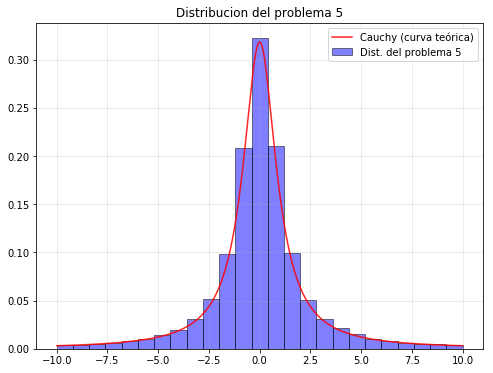

In [3]:
n=100000                                        #Defino la cantidad de números n que pide el enunciado
c=1                                             #Defino el factor de normalización que voy a usar para el intervalo 
                                                #[-pi/2, pi/2]

x=np.linspace(-10,10,n)                         #Genero un array de n números equiespaciados en el intervalo imagen
                                                # de la función barra(n,0,1).
    
y1 = barra(n,-pi/2,pi/2)                        #Genero los arrays de barra(n,-pi/2,pi/2) y cauchy(-10,10,n,1). 
y2 = cauchy(-10,10,n,c)                         
                                                

#Ploteo el histograma con los valores generados por la función barra (sin su error, ya que quiero ver la forma
#cualitativamente)
bins=25                                         #Cant. de bins del histograma
                                                
plt.figure(figsize=(8,6))
n1, bins1, patches1 = plt.hist(y1, bins= bins, range=(-10,10), density=True, align='mid', facecolor='blue', edgecolor='black', alpha=0.5)
plt.title('Distribucion del problema 5')

plt.plot(x,y2, color='red', alpha=0.85)                         #Curva teórica
plt.legend(('Cauchy (curva teórica)','Dist. del problema 5'))
plt.grid(alpha=0.3)

Se nota cualitativamente en el histograma que la distribución tiene la forma de Cauchy. Ahora, lo que me piden es generar esta distribución, pero a partir de la U[0,1]. Eso es equivalente a pensar que va a ser un 'recorte' de la distribución que grafiqué más arriba.

Para hacerlo nuevamente generé 10000 números al azar que sigan esta distribución, pero ahora a partir de la U[0,1]. En este caso además coloqué los errores en el histograma y grafiqué encima la curva teórica de la distribución.

Respecto de la curva teórica cabe aclarar que para que mantenga la misma normalización que el histograma, la integral de la distribución de cauchy ahora no debe dar 1 en todo el rango de R, sino solamente en el intervalo [tan(0),tan(1)], que es la imagen de haberle aplicado tangente a la U[0,1]. Este factor de normalización fue calculado a mano realizanfo la integral de la distribución entre tan(0) y tan(1), obteniendo como resultado que c = pi.

Respecto de los errores del histograma, se tomó una distribución de Poisson para estimar los mismos, ya que el número n de números es muy alto, y la probabilidad de que cada número caiga en un determinado bin es muy baja. Se utilizó la altura de cada bin como el valor esperado del mismo. A su vez, como el histograma está normalizado, también devió normalizarse el error. Para esto se calculó cuál fue el factor de normalización utilizado por la función hist(). Este se obtubo como el cociente entre la altura del bin sin normalizar y el bin normalizado. Con esto se reescaló el error de cada bin.

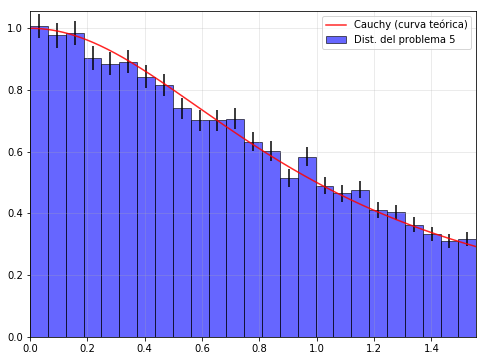

In [4]:
#%%  Item 1
n=10000                                         #Defino la cantidad de números n que pide el enunciado
c=pi                                            #Defino el factor de normalización que voy a usar para el intervalo 
                                                #correspondiente

x=np.linspace(tan(0),tan(1),n)                  #Genero un array de n números equiespaciados en el intervalo imagen
                                                # de la función barra(n,0,1).
                                                
y1 = barra(n,0,1)                               #Genero los arrays de barra(n,0,1) y cauchy(tan(0),tan(1),n,pi). El coeficiente
y2 = cauchy(tan(0),tan(1),n,c)                  #de normalización pi fue calculado a mano para la cauchy en el 
                                                # intervalo [tan(0),tan(1)].
                                                

#Ploteo el histograma con los valores generados por la función barra (con su error), y la curva teórica de la dist. de Cauchy
# generada por la función cauchy.
bins=25                                         #Cant. de bins de los histogramas

norm1, normbins1 = np.histogram(y1, bins= bins) #Utilizo esto solamente para obtener la altura real de los bins sin normalizar.
                                                #Esto lo uso más adelante para normalizar el error de cada bin en el histograma
                                                #normalizado.
                                                
plt.figure(figsize=(8,6))
n1, bins1, patches1 = plt.hist(y1, bins= bins, density=True, align='mid', facecolor='blue', edgecolor='black', alpha=0.6)


errory1 = np.sqrt(n1/(norm1/n1))                                #Error de los bins del histograma, normalizado
xe=np.linspace(bins1[1]/2,bins1[len(bins1)-1]-bins1[1]/2,bins)  #Posición en x de las barras de error
plt.bar(xe, n1, yerr=errory1,ecolor='black', alpha=0)           #Barras de error del histograma.

plt.plot(x,y2, color='red', alpha=0.85)                         #Curva teórica
plt.legend(('Cauchy (curva teórica)','Dist. del problema 5'))
plt.axis([tan(0),tan(1),0,max(n1)+0.05])
plt.grid(alpha=0.3)

Se puede ver en la figura que los valores de los bins con su error solapan con la curva teórica. A su vez el error relativo de los distintos bines coincide con el que tenían cuando el histograma no estaba normalizado. Obtener esto fue el motivo de calcular el factor de normalización ustilizado por la función hist(). Hay que prestar atención, porque justamente en este caso, si se intenta normalizar el error de los bines dividiendo por el número de intentos, se estará subestimando el error de los mismos, ya que el número de intentos es el factor de normalización cuando el ancho de los bins es la unidad. En este caso, el ancho de los bins es más chico, con lo cuál el factor de normalización es más chico que la cantidad de números generados.

A continuación grafico el histograma sin normalizar con sus errores, y el histograma normalizado con el error mal calculado (usando n = # de números generados) como factor de normalización para que se note visualmente la diferencia en el error relativo de los bines.

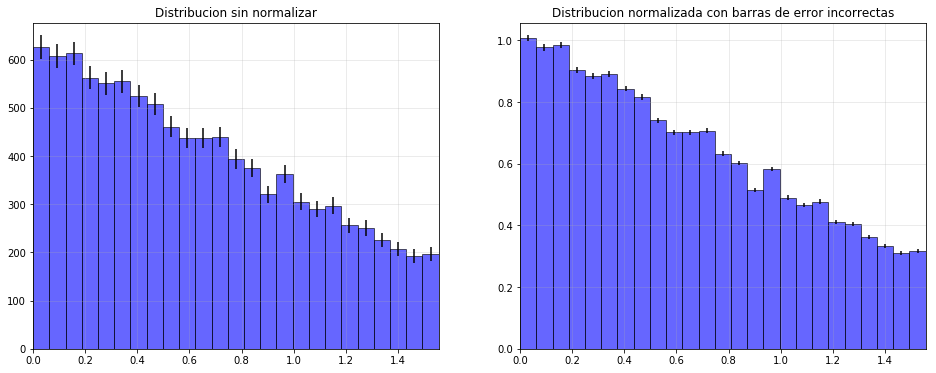

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
norm1, normbins1, normpatches1 = plt.hist(y1, bins= bins, density=False, align='mid', facecolor='blue', edgecolor='black', alpha=0.6) 
errory1norm = np.sqrt(norm1)                                
xe=np.linspace(bins1[1]/2,bins1[len(bins1)-1]-bins1[1]/2,bins)  
plt.bar(xe, norm1, yerr=errory1norm,ecolor='black', alpha=0)           
plt.title('Distribucion sin normalizar')
plt.axis([tan(0),tan(1),0,max(norm1)+50])                    
plt.grid(alpha=0.3)
                                                

plt.subplot(1,2,2)
n1mal, bins1mal, patches1mal = plt.hist(y1, bins= bins, density=True, align='mid', facecolor='blue', edgecolor='black', alpha=0.6)


errory1mal = np.sqrt(n1/n)                                
xe=np.linspace(bins1[1]/2,bins1[len(bins1)-1]-bins1[1]/2,bins)  
plt.bar(xe, n1, yerr=errory1mal,ecolor='black', alpha=0)           
plt.title('Distribucion normalizada con barras de error incorrectas')
plt.axis([tan(0),tan(1),0,max(n1)+0.05])                    
plt.grid(alpha=0.3) 



### Item 2
Ahora repetimos el item anterior pero utilizando el método Monte Carlo. Primero se van generando números z e y aleatorios con distribución U[0,1]. Con ellos voy a armar otro par de números u y v, dónde u va a representar valores de mi eje de abscisas, y v va a representar valores de mi eje de ordenadas. De esa forma se van a generar puntos (u,v) aleatorios, y si estos puntos caen debajo de la curva de la f (Cauchy) serán aceptados (y guardados en un array x2). De lo contrario serán rechazados.

Así nos formamos un array que contiene 10000 valores de u que fueron aceptados. Con estos valores de u aceptados realizamos un histograma, y sobre el mismo se ploteó la curva teórica de cauchy con el factor de normalización mencionado en el item anterior. El error de los bines se calculo de forma análoga a lo explicado en el item anterior.

Nota: para comparar los histogramas del item 1 y 2, se copia a continuación a principio del código, el código del item 1.

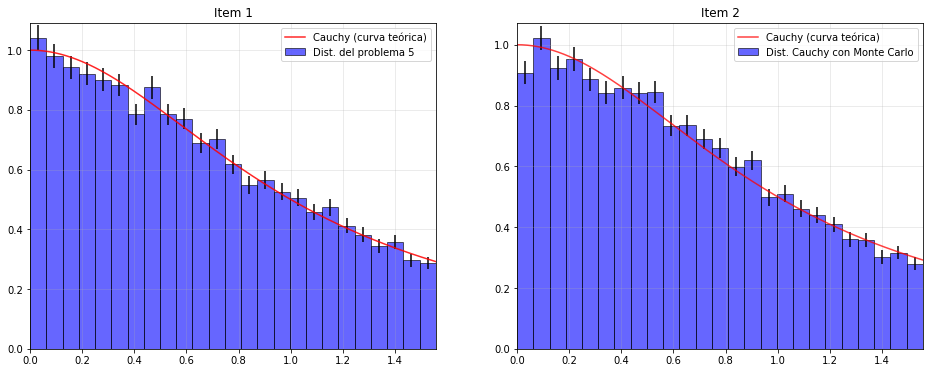

In [ ]:
#%%  Item 1---------------------------------------------------------------------------------------------------------------------
n=10000                                         #Defino la cantidad de números n que pide el enunciado
c=pi                                            #Defino el factor de normalización que voy a usar para el intervalo 
                                                #correspondiente

x=np.linspace(tan(0),tan(1),n)                  #Genero un array de n números equiespaciados en el intervalo imagen
                                                # de la función barra(n,0,1).
                                                
y1 = barra(n,0,1)                               #Genero los arrays de barra(n,0,1) y cauchy(tan(0),tan(1),n,pi). El coeficiente
y2 = cauchy(tan(0),tan(1),n,c)                  #de normalización pi fue calculado a mano para la cauchy en el 
                                                # intervalo [tan(0),tan(1)].
                                                

#Ploteo el histograma con los valores generados por la función barra (con su error), y la curva teórica de la dist. de Cauchy
# generada por la función cauchy.
bins=25                                         #Cant. de bins de los histogramas

norm1, normbins1 = np.histogram(y1, bins= bins) #Utilizo esto solamente para obtener la altura real de los bins sin normalizar.
                                                #Esto lo uso más adelante para normalizar el error de cada bin en el histograma
                                                #normalizado.
                                                
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Item 1')
n1, bins1, patches1 = plt.hist(y1, bins= bins, density=True, align='mid', facecolor='blue', edgecolor='black', alpha=0.6)


errory1 = np.sqrt(n1/(norm1/n1))                                #Error de los bins del histograma, normalizado
xe=np.linspace(bins1[1]/2,bins1[len(bins1)-1]-bins1[1]/2,bins)  #Posición en x de las barras de error
plt.bar(xe, n1, yerr=errory1,ecolor='black', alpha=0)           #Barras de error del histograma.

plt.plot(x,y2, color='red', alpha=0.85)                         #Curva teórica
plt.legend(('Cauchy (curva teórica)','Dist. del problema 5'))
plt.axis([tan(0),tan(1),0,max(n1)+0.05])
plt.grid(alpha=0.3)
#%%  Item 1---------------------------------------------------------------------------------------------------------------------


#%%  Item 2

x2=[]                                           
maximo = max(cauchy(tan(0),tan(1),n,pi))        #Defino el máximo de la dist. de Cauchy en el intervalo [tan(0),tan(1)]

while len(x2) < n:
    y = np.random.uniform(0,1)                  #Defino números z e y con distribución U[0,1].
    z = np.random.uniform(0,1)
    u = tan(0)+(tan(1)-tan(0))*y                #Ahora genero u y v siguiendo las indicaciones del método Monte Carlo, y
    v = maximo*z                                # usando como f la dist. de Cauchy.
    if v <= cauchy2(u,pi):                      #armo un array (x2) con todos los valores de u tal que v<=f(u).
        x2.append(u)
        
        
#Ploteo el histograma con los valores de la dist. de Cauchy generados por el método de Monte Carlo, y la curva teórica 
# de la dist. de Cauchy generada por la función cauchy.

norm2, normbins2 = np.histogram(x2, bins= bins) #Utilizo esto solamente para obtener la altura real de los bins sin normalizar.
                                                #Esto lo uso más adelante para normalizar el error de cada bin en el histograma
                                                #normalizado.
        

plt.subplot(1,2,2)
plt.title('Item 2')
n2, bins2, patches2 = plt.hist(x2, bins= bins, density=True, align='mid', facecolor='blue', edgecolor='black', alpha=0.6)

errory2 = np.sqrt(n2/(norm2/n2))                                   #Error de los bins del histograma, normalizado
xe2=np.linspace(bins2[1]/2,bins2[len(bins2)-1]-bins2[1]/2,bins) #Posición en x de las barras de error
plt.bar(xe2, n2, yerr=errory2,ecolor='black', alpha=0)          #Barras de error del histograma.

plt.plot(x,y2, color='red', alpha=0.75)                         #Curva teórica
plt.legend(('Cauchy (curva teórica)','Dist. Cauchy con Monte Carlo'))
plt.axis([tan(0),tan(1),0,max(n2)+0.05])
plt.grid(alpha=0.3)

Se puede ver en la figura del item 2 que los valores de los bins con su error solapan con la curva teórica. A su vez, nuevamente, el error relativo de los distintos bines coincide con el que tenían cuando el histograma no estaba normalizado.

Quise ver como mejoraba la forma del histograma con la cantidad n de números, y como se acercaba más a la forma de la distribución de cauchy. Para ver eso copio abajo el codigo de los items 1 y 2 pero con un n más grande.

In [ ]:
#%%  Item 1---------------------------------------------------------------------------------------------------------------------
n=1000000                                         #Defino la cantidad de números n que pide el enunciado
c=pi                                            #Defino el factor de normalización que voy a usar para el intervalo 
                                                #correspondiente

x=np.linspace(tan(0),tan(1),n)                  #Genero un array de n números equiespaciados en el intervalo imagen
                                                # de la función barra(n,0,1).
                                                
y1 = barra(n,0,1)                               #Genero los arrays de barra(n,0,1) y cauchy(tan(0),tan(1),n,pi). El coeficiente
y2 = cauchy(tan(0),tan(1),n,c)                  #de normalización pi fue calculado a mano para la cauchy en el 
                                                # intervalo [tan(0),tan(1)].
                                                

#Ploteo el histograma con los valores generados por la función barra (con su error), y la curva teórica de la dist. de Cauchy
# generada por la función cauchy.
bins=25                                         #Cant. de bins de los histogramas

norm1, normbins1 = np.histogram(y1, bins= bins) #Utilizo esto solamente para obtener la altura real de los bins sin normalizar.
                                                #Esto lo uso más adelante para normalizar el error de cada bin en el histograma
                                                #normalizado.
                                                
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Item 1')
n1, bins1, patches1 = plt.hist(y1, bins= bins, density=True, align='mid', facecolor='blue', edgecolor='black', alpha=0.6)


errory1 = np.sqrt(n1/(norm1/n1))                                #Error de los bins del histograma, normalizado
xe=np.linspace(bins1[1]/2,bins1[len(bins1)-1]-bins1[1]/2,bins)  #Posición en x de las barras de error
plt.bar(xe, n1, yerr=errory1,ecolor='black', alpha=0)           #Barras de error del histograma.

plt.plot(x,y2, color='red', alpha=0.85)                         #Curva teórica
plt.legend(('Cauchy (curva teórica)','Dist. del problema 5'))
plt.axis([tan(0),tan(1),0,max(n1)+0.05])
plt.grid(alpha=0.3)
#%%  Item 1---------------------------------------------------------------------------------------------------------------------


#%%  Item 2

x2=[]                                           
maximo = max(cauchy(tan(0),tan(1),n,pi))        #Defino el máximo de la dist. de Cauchy en el intervalo [tan(0),tan(1)]

while len(x2) < n:
    y = np.random.uniform(0,1)                  #Defino números z e y con distribución U[0,1].
    z = np.random.uniform(0,1)
    u = tan(0)+(tan(1)-tan(0))*y                #Ahora genero u y v siguiendo las indicaciones del método Monte Carlo, y
    v = maximo*z                                # usando como f la dist. de Cauchy.
    if v <= cauchy2(u,pi):                      #armo un array (x2) con todos los valores de u tal que v<=f(u).
        x2.append(u)
        
        
#Ploteo el histograma con los valores de la dist. de Cauchy generados por el método de Monte Carlo, y la curva teórica 
# de la dist. de Cauchy generada por la función cauchy.

norm2, normbins2 = np.histogram(x2, bins= bins) #Utilizo esto solamente para obtener la altura real de los bins sin normalizar.
                                                #Esto lo uso más adelante para normalizar el error de cada bin en el histograma
                                                #normalizado.
        

plt.subplot(1,2,2)
plt.title('Item 2')
n2, bins2, patches2 = plt.hist(x2, bins= bins, density=True, align='mid', facecolor='blue', edgecolor='black', alpha=0.6)

errory2 = np.sqrt(n2/(norm2/n2))                                   #Error de los bins del histograma, normalizado
xe2=np.linspace(bins2[1]/2,bins2[len(bins2)-1]-bins2[1]/2,bins) #Posición en x de las barras de error
plt.bar(xe2, n2, yerr=errory2,ecolor='black', alpha=0)          #Barras de error del histograma.

plt.plot(x,y2, color='red', alpha=0.75)                         #Curva teórica
plt.legend(('Cauchy (curva teórica)','Dist. Cauchy con Monte Carlo'))
plt.axis([tan(0),tan(1),0,max(n2)+0.05])
plt.grid(alpha=0.3)

### Item 3

Como se pudo ver en las imágenes presentadas anteriormente, tanto el método del problema 5 como el método de Monte carlo permitieron generar un histograma con distribución de Cauchy. Para n suficientemente grandes incluso es imposible distinguirlos 'a simple vista'. Pero cabe aclarar que cada uno tuvo una serie de ventajas o desventajas.

Por ejemplo, el método de Monte Carlo requiere que uno conozca la forma funcional de la distribución que se quiere muestrear.
En contraposición, si uno conoce la distribución que quiere muestrear, el método es muy simple y fácil de programar. En el caso del muestreo realizado en el item 1, fue necesario conocer un cambio de variables que permitió pasar de una distribución uniforme a una Cauchy. Para otras distribuciones (sobre todo si son más complejas) uno podría no conocer dicho cambio de variable para generar la distribución deseada desde una distribución uniforme (o desde alguna distribución fácilmente programable).

## Problema 2 - Guía 5(G5P8y9)
### Cuadrados mínimos y banda de error

Primero genero los arrays x e y con los valores de las mediciones dados en el ejercicio,  con el sigma informado.

In [ ]:
x=np.array([2.00, 2.10, 2.20, 2.30, 2.40, 2.50, 2.60, 2.70, 2.80, 2.90, 3.00])   #Armo los arrays x e y con los datos del
y=np.array([2.78, 3.29, 3.29, 3.33, 3.23, 3.69, 3.46, 3.87, 3.62, 3.40, 3.99])   # ejercicio, y defino el sigma de los valores y
sig=0.3

Luego defino las funciones que voy a utilizar a lo largo del ejercicio. Las funciones pendiente y ordenada van a calcular la pendiente y ordenada de un ajuste lineal de los datos (x,y) mediante el método de cuadrados mínimos. Para esto van a utilizar la función delta que genera el coeficiente delta del ajuste de cuadrados mínimos como está definido en el ejercicio 8. Además la función covarianza va a calcular la covarianza entre los parámetros pendiente y ordenada al origen del ajuste, devolviendo una matriz de covarianza.

In [ ]:
def Delta(x,y):                                         #Defino la función Delta que calcula el delta del ajuste
    D=(len(x)*sum(x**2))-(sum(x)**2)                    #de cuadrados mínimos realizado a una serie de datos (x,y)
    return D

def ordenada(x,y):                                      #Defino la función ordenada que calcula la ordenada al origen
    b=(sum(x**2)*sum(y)-sum(x)*sum(x*y))/Delta(x,y)     #de un ajuste lineal realizado a una seríe de datos (x,y)
    return b

def pendiente(x,y):                                     #Defino la función pendiente que calcula la pendiente de un ajuste
    a=(len(x)*sum(x*y)-sum(x)*sum(y))/Delta(x,y)        # lineal realizado a una serie de datos (x,y)
    return a

def covarianza(x,y):                                    #Defino la función covarianza que devuelve la matriz de covarianza de
    C = np.zeros((2, 2))                                #los parámetros del ajuste lineal realizado sobre una serie de 
    C[0][0] = (sig**2/Delta(x,y))*sum(x**2)             # datos (x,y)
    C[1][1] = (sig**2/Delta(x,y))*len(x)
    C[0][1] = -(sig**2/Delta(x,y))*sum(x)
    C[1][0] = -(sig**2/Delta(x,y))*sum(x)
    return C

### Item 1

Utilizando las funciones auxiliares calculo la pendiente y la ordenada al origen del ajuste lineal de los datos, utilizando cuadrados mínimos. Además calculo las varianzas de la pendiente y la ordenada, y la covarianza entre pendiente y ordenada. También calculo los sigmas de la pendiente y la ordenada.

In [ ]:
a1 = pendiente(x,y)
b1 = ordenada (x,y)
Vara = covarianza(x,y)[1][1]
Varb = covarianza(x,y)[0][0]
covab = covarianza(x,y)[0][1]
siga1 = math.sqrt(Vara)
sigb1 = math.sqrt(Varb)

print('La pendiente del ajuste es a1 =', a1, '±', siga1,' y la ordenada al origen es b1 =', b1, '±', sigb1)
print('La matriz de covarianza es:')
print(covarianza(x,y))

Se ve que los términos de la covarianza entre pendiente y ordenada al origen (especificamente los que no están en la diagonal) dieron negativos. Esto habla de como es la relación entre la pendiente y la ordenada. Por ejemplo, un aumento en la pendiente calculada generaría una disminución en el valor de la ordenada al origen, y viceversa. Esto tiene sentido si pensamos que todos los valores medidos se encuentran en el espacio de los x positivos. En caso de que se hubiesen encontrado en el espacio de los x negativos es fácil ver que la covarianza hubiera quedado positiva (viendo la formula de los términos que no están en la diagonal se ve que van como -sum(x)) haciendo que un aumento en la pendiente se condiga con un aumento en la ordenada. El último caso sería que no estén correlacionadas, momento en el cual un aumento de la pendiente no modificaría la ordenada, y viceversa. Esto ocurre cuando la suma de los x da 0, es decir hay puntos a ambos lados del eje y, y con distancias tales que se cancelan entre si.

Posteriormente grafico los datos junto con la recta que mejor los ajusta para el intervalo de x [2,3], así se pueden apreciar las barras de error de los datos y como la recta del ajuste choca con los datos con su error o no. Luego grafico nuevamente los datos más la recta del ajuste, pero ahora para el intervalo de x [0,5] como me piden en el ejercicio.

In [ ]:
a=2                                                         #Defino el intervalo para el primer grafico, zoomeado
b=3

x2=np.arange(a,b+0.02,0.02)                                 #Armo un array x para graficar el ajuste
f=a1*x2 + b1                                                #Armo un array con los valores en y del ajuste

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Zoom del gráfico pedido')                        #Realizo el gráfico de los datos y el ajuate
plt.errorbar(x,y,color='red',yerr=sig, fmt="o", alpha=0.5)  # en el intervalo [2,3] 
plt.plot(x2,f)
plt.legend(('Ajuste lineal', 'Datos'))
plt.grid(alpha=0.5)

a=0                                                         #Defino el intervalo para el primer grafico, zoomeado
b=5

x2=np.arange(a,b,0.02)                                      #Armo un array x para graficar el ajuste
f=a1*x2 + b1                                                #Armo un array con los valores en y del ajuste


plt.subplot(1,2,2)
plt.title('Gráfico pedido')                                 #Realizo el gráfico de los datos y el ajuate
plt.errorbar(x,y,color='red',yerr=sig, fmt="o", alpha=0.5)  # en el intervalo [0,5] 
plt.plot(x2,f)
plt.legend(('Ajuste lineal', 'Datos'))
plt.grid(alpha=0.5)

Se puede notar en el primer gráfico que los datos son bien ajustados por la lineal. Deja un poco que pensar el hecho de que más del 68% de los datos con su error solapan con la recta. Sabiendo que los datos probablemente provengan de una gaussiana (porque si bien no nos dicen de que son, seguramente provengan de la composición de muchas variables aleatorias con distribuciones distintas, y por teorema central del límite eso da una variable aleatoria con distribución gaussiana) se podría llegar a pensar que tal vez el sigma esté levemente sobreestimado.

## Item 2
En este item nos piden  predecir con su error el valor esperado de ya para un cierto xa. Para hacer esto calculé la varianza de los ya haciendo propagación de errores. Ese cálculo fue realizado a mano, obteniendose la varianza de ya en función de las varianzas y la covarianza de los parámetros del asjuste, y de los xa. Abajo figura en el código la expresión a la que se llegó de forma manual para la varianza de ya. Una vez obtenida la varianza de ya se calculo sigma de ya.

Una vez obtenido esto se grafican dos curvas: una que es ya + sigma de ya, y otra que es ya - sigma de ya. De esa forma se  arma la banda de error de los ya para cada uno de los xa en el rango [0,5]

In [ ]:
Varya = (x2**2)*Vara+Varb+2*x2*covab                        #Armo un array con la varianza de cada ya,
                                                            #utilizando la expresión obtenida de hacer
                                                            #propagación de errores sobre los parámetros
                                                            #del ajuste lineal (calculada manualmente)

sigmaya = np.sqrt(Varya)                                    #Calculo el sigma de ya
#probar sacar el término de la covarianza y ver como queda

ya1 = pendiente(x,y)*x2 + ordenada(x,y) + sigmaya           #Calculo la curva con ya + sigma de ya
ya2 = pendiente(x,y)*x2 + ordenada(x,y) - sigmaya           #Calculo la curva con ya - sigma de ya

plt.figure(figsize=(8,6))                                   #Realizo el gráfico de los datos y el ajuste
plt.plot(x2,ya1, color='red',linewidth = 3, alpha=0.75)     #en el intervalo [0,5]. Además agrego la
plt.plot(x2,ya2, color='red',linewidth = 3, alpha=0.5)      #banda de error de los valores predichos de ya
plt.fill_between(x2,ya1,ya2, facecolor='red', alpha=0.1)    
plt.errorbar(x,y,color='red',yerr=sig, fmt="o", alpha=0.5)  
plt.plot(x2,f, linewidth = 2, alpha = 1)
plt.legend(('ya + sigma de ya', 'ya - sigma de ya','Ajuste lineal','Banda de error','Datos'))
plt.grid(alpha=0.5)

Viendo el gráfico se puede notar que nuestros parámetros de ajuste predicen valores de ya con mayor varianza a medida que nos alejamos de los datos medidos. Esto se debe a que la fluctuación de los posibles valores no medidos cambia mucho los parámetros de la recta, y eso afecta más a los valores que se alejan de los datos medidos. Como ahora la pendiente y la ordenada son nuestras variables aleatorias, se puede pensar que es como si todas las rectas posibles que ajusten a los datos pivotasen con un 'ángulo' equivalente a su sigma, y con eje en el centro de los datos medidos.

Se espera que la mínima varianza se alcance para un valor de xa que se encuentre en el medio del intervalo de mis datos en x.

Para comprobar esto vamos a calcular cuál es el xa que minimiza el error de ya. Esto lo realizé de dos formas. Una fue calcular a mano la derivada de la varianza de ya e igualarla a 0 (para encontrar el mínimo). Otra fue haciendo la resta entre las curvas ya1 e ya2 y buscando el xa para el cuál dicha resta daba más chico.

In [ ]:
xmin=-covab/Vara                        #Calculo el xa para el cuál el error de ya es mínimo, haciendo
                                        #la derivada de la varianza de ya y despejando el xa. La cuenta fue
                                        #realizada a mano y acá se usa directamente la expresión a la que llegué

print('Utilizando el método de la derivada de la varianza obtuve que xa=', xmin, ' es el valor que minimiza el error en ya')


resta = ya1-ya2                         #Defino un array donde las componentes son la resta entre 
                                        #las curvas ya1 e ya2.

j=resta[0]                              #El código evalúa para cada componente del array resta, si este (i) es
for i in range(len(ya1)-1):             #menor que el siguiente (i+1). De ser así lo guarda y guarda el índice de 
    if resta[i] < resta[i+1]:           #la componente. Luego compara el i+2 con el i+1 y con el guardado
        if j > resta[i]:                #si es que existe. Así, al terminar se posee la más chica de las
            c=i                         #componentes de resta, y su indice.
            j=resta[i]
            
print('Utilizando el método de la resta de las curvas obtuve que xa =', x2[c], 'es el valor que minimiza el error en ya')

Con estos resultados, ambos métodos para encontrar el xa que minimice el error en ya parecen compatibles. Además el xa obtenido es consistente con la predicción hecha anteriormente de que sería un valor que se encuentre en el medio de mis datos en x

Para poner esto más a prueba, repetí toda la operación pero para 2 nuevas tandas de datos: una con un dato extra equiespaciado del resto (así la cantidad de datos no es impar. La llamé x3) que siga la predicción del ajuste (asi modifica lo menos posible los datos obtenidos de pendientes, ordenadas y covarianzas. La llamé y3); y otra que también agregue un dato con las mismas caracteristas pero más alejado de los demás(x4 e y4). Lo que sigue es una copia del código usado anteriormente, pero ahora con los pares de datos (x3,y3) y (x4,y4).

In [ ]:
# Nuevos datos ------------------------------------------------------------------------------------------------
x3 = np.array([2.00, 2.10, 2.20, 2.30, 2.40, 2.50, 2.60, 2.70, 2.80, 2.90, 3.00, 3.10])   
y3 = np.array([2.78, 3.29, 3.29, 3.33, 3.23, 3.69, 3.46, 3.87, 3.62, 3.40, 3.99, a1*3.10 + b1])   
x4 = np.array([2.00, 2.10, 2.20, 2.30, 2.40, 2.50, 2.60, 2.70, 2.80, 2.90, 3.00, 4.00])   
y4 = np.array([2.78, 3.29, 3.29, 3.33, 3.23, 3.69, 3.46, 3.87, 3.62, 3.40, 3.99, a1*4.00 + b1])

# Copia del codigo utilizado anteriormente para los nuevos datos ---------------------------------------------------------------
a3 = pendiente(x3,y3)
b3 = ordenada (x3,y3)

a4 = pendiente(x4,y4)
b4 = ordenada (x4,y4)

Vara3 = covarianza(x3,y3)[1][1]
Varb3 = covarianza(x3,y3)[0][0]
covab3 = covarianza(x3,y3)[0][1]
siga3 = math.sqrt(Vara3)
sigb3 = math.sqrt(Varb3)

Vara4 = covarianza(x4,y4)[1][1]
Varb4 = covarianza(x4,y4)[0][0]
covab4 = covarianza(x4,y4)[0][1]
siga4 = math.sqrt(Vara4)
sigb4 = math.sqrt(Varb4)

print('La pendiente del ajuste es a3 =', a3, '±', siga3,' y la ordenada al origen es b3 =', b3, '±', sigb3)
print('La matriz de covarianza3 es:')
print(covarianza(x3,y3))

print('La pendiente del ajuste es a4 =', a4, '±', siga4,' y la ordenada al origen es b4 =', b4, '±', sigb4)
print('La matriz de covarianza4 es:')
print(covarianza(x4,y4))

plt.figure(figsize=(16,6))


a=0
b=5

x2=np.arange(a,b,0.02)                             
f3=a3*x2 + b3                                      
f4=a4*x2 + b4

Varya3 = (x2**2)*Vara3+Varb3+2*x2*covab3               
Varya4 = (x2**2)*Vara4+Varb4+2*x2*covab4               

sigmaya3 = np.sqrt(Varya3)                            
sigmaya4 = np.sqrt(Varya4)                           

ya13 = pendiente(x3,y3)*x2 + ordenada(x3,y3) + sigmaya3      
ya23 = pendiente(x3,y3)*x2 + ordenada(x3,y3) - sigmaya3        

ya14 = pendiente(x4,y4)*x2 + ordenada(x4,y4) + sigmaya4        
ya24 = pendiente(x4,y4)*x2 + ordenada(x4,y4) - sigmaya4        
                      
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(x2,ya13, color='r',linewidth = 3, alpha=0.75)  
plt.plot(x2,ya23, color='r',linewidth = 3, alpha=0.5)    
plt.fill_between(x2,ya13,ya23, facecolor='r', alpha=0.1)    
plt.errorbar(x3,y3,color='r',yerr=sig, fmt="o", alpha=0.5)  
plt.plot(x2,f3, linewidth = 2, alpha = 1)
plt.legend(('ya3 + sigma de ya3', 'ya3 - sigma de ya3','Ajuste lineal 3','Banda de error 3','Datos 3'))
plt.grid(alpha=0.5)


plt.subplot(1,2,2)
plt.plot(x2,ya14, color='r',linewidth = 3, alpha=0.75)     #en el intervalo [0,5]. Además agrego la
plt.plot(x2,ya24, color='r',linewidth = 3, alpha=0.5)      #banda de error de los valores predichos de ya
plt.fill_between(x2,ya14,ya24, facecolor='r', alpha=0.1)    
plt.errorbar(x4,y4,color='r',yerr=sig, fmt="o", alpha=0.5)  
plt.plot(x2,f4, linewidth = 2, alpha = 1)
plt.legend(('ya4 + sigma de ya4', 'ya4 - sigma de ya4','Ajuste lineal 4','Banda de error 4','Datos 4'))
plt.grid(alpha=0.5)


xmin3=-covab3/Vara3                      
xmin4=-covab4/Vara4                     

print('Utilizando el método de la derivada de la varianza obtuve que xa3=', xmin3, ' es el valor que minimiza el error en ya3')
print('Utilizando el método de la derivada de la varianza obtuve que xa4=', xmin4, ' es el valor que minimiza el error en ya4')


resta3 = ya13-ya23           
resta4 = ya14-ya24            

j3=resta[0]                        
for i in range(len(ya13)-1):      
    if resta3[i] < resta3[i+1]:      
        if j3 > resta3[i]:          
            c3=i                    
            j3=resta3[i]
            
j4=resta[0]                        
for i in range(len(ya14)-1):        
    if resta4[i] < resta4[i+1]:    
        if j4 > resta4[i]:         
            c4=i               
            j4=resta4[i]


print('Utilizando el método de la resta de las curvas obtuve que xa3 =', x2[c3], 'es el valor que minimiza el error en ya3')
print('Utilizando el método de la resta de las curvas obtuve que xa4 =', x2[c4], 'es el valor que minimiza el error en ya4')

Se ve que se logró lo que quería, porque las nuevas pendientes y ordenadas no difieren de las anteriores hasta en un orden de 10^-3. Lo que si se nota que cambió de forma notable son lso términos de la covarianza.

Comparando ambas lo primero que se nota es que para la tira de datos con un x más alejado de los demás, la varianza de los parámetros de ajuste se achica. Esto tiene sentido por lo que se decía anteriormente que se puede pensar a las distintas rectas que podrían ajustar como 'pivotando' con un ángulo que tiene que ver con el sigma de los datos medidos y que tan separados están.

Por otro lado se ve que mantienen el termino cruzado de la covarianza negativo, lo cuál era de esperar ya que siguen estando todos los puntos en valores de x>0.

Lo más interesante quizás es que ahora gracias a esta prueba, los valores esperados de xa que minimiza el error en ya cambiaron en cada caso. Que en el caso de los calculados para x4 den un xa mayor a 2.5 y al calculado para x3 es esperable ya que ahora los valores de x medidos van más lejos en x4 que en x3. Se nota que igualmente el xa que minimiza el error es el promedio de  los x medidos. Y acá se puede notar otra cosa que es que el método de la derivada es mejor al de la resta, ya que permite calcular el xa que minimiza el error aunque este no haya sido sampleado. El método de la resta solo calcula el xa que minimiza el error y que haya sido sampleado (en este caso, que esté en el array x2).

## Item 3
Ahora voy a plotear el gráfico con la banda de error correcta y la banda incorrecta (calculada sin tener en cuenta la covarianza de la pendiente con la ordenada).

In [ ]:
Varyamal = (x2**2)*Vara+Varb+2*x2*covab*0                   #Armo un array con la varianza de cada ya,
                                                            # ahora mal calculada eliminando el término de la covarianza

sigmayamal = np.sqrt(Varyamal) 

ya1mal = pendiente(x,y)*x2 + ordenada(x,y) + sigmayamal
ya2mal = pendiente(x,y)*x2 + ordenada(x,y) - sigmayamal

plt.figure(figsize=(8,6))                                   #Realizo el gráfico de los datos y el ajuste
plt.plot(x2,ya1, color='red',linewidth = 3, alpha=0.75)     #en el intervalo [0,5]. Además agrego la
plt.plot(x2,ya2, color='red',linewidth = 3, alpha=0.5)      #banda de error de los valores predichos de ya de
plt.fill_between(x2,ya1,ya2, facecolor='red', alpha=0.1)    # forma correcta e incorrecta
plt.plot(x2,ya1mal, color='g',linewidth = 3, alpha=0.75)     
plt.plot(x2,ya2mal, color='g',linewidth = 3, alpha=0.5)      
plt.fill_between(x2,ya1mal,ya2mal, facecolor='g', alpha=0.1)    
plt.errorbar(x,y,color='red',yerr=sig, fmt="o", alpha=0.5)  
plt.plot(x2,f, linewidth = 2, alpha = 1)
plt.legend(('ya + sigma de ya', 'ya - sigma de ya','ya_mal + sigma de ya_mal','ya_mal - sigma de ya_mal','Ajuste lineal','Banda de error','Banda de error mal','Datos'))
plt.grid(alpha=0.5)

Se ve en el gráfico que el error ahora está muy sobreestimado. Al no tener en cuenta la covarianza entre ordenada y pendiente, pareciera que el 'eje' sobre el que pivotan las posibles rectas de ajuste está en x = 0. Es decir, como si el minimo error en ya fuese en xa = 0 (cosa que pasaría solo si la covarianza cruzada fuese 0).

## Item 4
Armo la función simulación que relaiza la simulación pedida por el item 4, donde para cada xi se genera al azar un yi de la distribución gaussiana N(b1 + a1*xi,sigma). Luego ajusta una recta a los (xi,yi) generados, y predice el valor ya para xa = 0,5. Esto lo repite m veces.

Por último construyo un histograma con los valores de ya y grafico sobre el mismo una gaussiana con la esperanza de ya calculada en el item 2 y su sigma.

In [ ]:
def simulacion(x,y,sig,m,xa):
    ya5=[]
    for i in range(m):
        r = norm.rvs(pendiente(x,y)*x+ordenada(x,y), sig)
        ya5.append(pendiente(x,r)*xa + ordenada(x,r))
    ya5 = np.array(ya5)
    return ya5

m = 1000
xa = 0.5
ya = a1*xa + b1  

Varya5 = (xa**2)*Vara+Varb+2*xa*covab                       #Armo un array con la varianza de cada ya,
                                                            #utilizando la expresión obtenida de hacer
                                                            #propagación de errores sobre los parámetros
                                                            #del ajuste lineal (calculada manualmente)

sigmaya5 = np.sqrt(Varya5)

ya5 = simulacion(x,y,sig,m,xa)

binsya=25

norm5, normbins5 = np.histogram(ya5, bins= binsya)  #Utilizo esto solamente para obtener la altura real de los bins sin normalizar.
                                                    #Esto lo uso más adelante para normalizar el error de cada bin en el histograma
                                                    #normalizado.

plt.figure(figsize=(8,6))
n5, bins5, patches5 = plt.hist(ya5, bins= binsya, density=True, align='mid', facecolor='blue', edgecolor='black', alpha=0.5)
errorya5 = np.sqrt(n5/(norm5/n5))                                #Error de los bins del histograma, normalizado
xe5=np.linspace((bins5[0]+bins5[1])/2,(bins5[-1]+bins5[-2])/2,binsya) #Posición en x de las barras de error
plt.bar(xe5, n5, yerr=errorya5,ecolor='black', alpha=0)          #Barras de error del histograma.
# Graficando Función de Densidad de Probibilidad con Python

x_5 = np.linspace(sci.norm(ya, sigmaya5).ppf(0.001), sci.norm(ya, sigmaya5).ppf(0.999), 10000)
normal5 = sci.norm(ya, sigmaya5).pdf(x_5) # FDP
plt.plot(x_5, normal5, label='FDP nomal')
plt.legend(('N(ya,sigmaya) para xa = 0.5','Densidad de probabilidad de ya para xa = 0.5'))
plt.grid()

Se puede ver que la distribución solapa con la curva teórica teniendo en cuenta el error del histograma. Se puede entender que esta distribución es un corte vertical hecho sobre los gráficos dibujados más arriba con als bandas de error.